In [1]:
# Import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
# GOOGLE DRIVE SET UP
from google.colab import drive
# Mount my Google Drive
drive.mount('/content/gdrive')

## This is the file path for my Google Drive account
## CHANGE THIS STRING TO REFLECT WHERE THE FILE IS STORED
file_path = "/content/gdrive/My Drive/"

## Import the data as a dataframe
titanic = pd.read_csv('/content/gdrive/My Drive/titanic_train.csv')

Mounted at /content/gdrive


In [3]:
titanic = pd.read_csv('/content/gdrive/My Drive/titanic_train.csv')

In [4]:
titanic
# Sibsp = # of siblings/spouse
# Parch = # of parent/child
# Embarked =
    #C;Chersbourg,Q;Queenstown, S;Southamptn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen Carrie",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Data Cleaning

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print("Number of Duplicated Rows:", titanic.duplicated().sum())

Number of Duplicated Rows: 0


In [7]:
titanic["Cabin"] = titanic["Cabin"].fillna("?")

In [8]:
titanic = titanic.dropna()

In [9]:
titanic.describe() #this is a statistical summary
#count is the number of values in the catagories
#mean is the average of the catagories; not all of the values are significant
#std is the standard deviation and this is the amount of change between values
#min is the minimum values
#25%, 50%, 75% are the quartiles
#max is the maximum values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


#An Interesting Comparison

In [10]:
titanic_pt = pd.pivot_table(titanic, values='Fare', index=['Embarked'],
                       columns=['Pclass'], aggfunc="mean")
print(titanic_pt)

Pclass             1          2          3
Embarked                                  
C         108.246399  26.811947  11.369927
Q          90.000000  12.350000  12.780904
S          74.172415  21.075000  13.529451


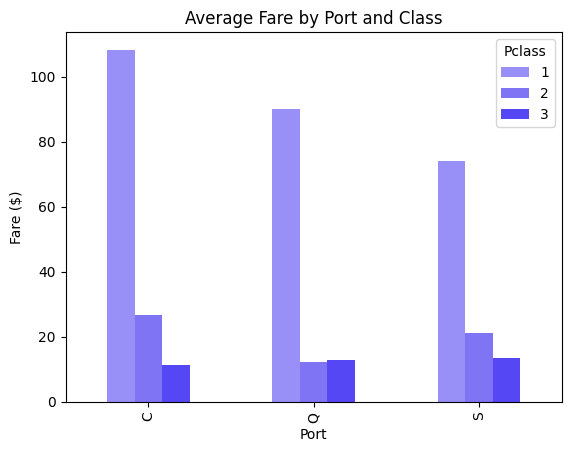

In [36]:
colors = ['#9990f7','#7f74f4','#5647f4']

titanic_pt.plot(kind="bar", xlabel="Port", ylabel="Fare ($)",\
                  title="Average Fare by Port and Class", color = colors)
plt.savefig("SomethingInteresting.png")

#Box and Whisker

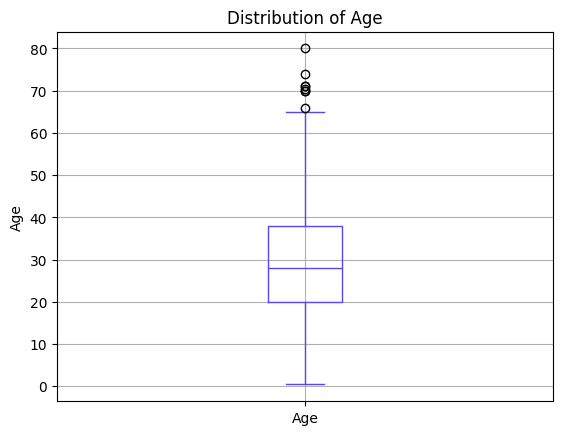

In [42]:
titanic.boxplot('Age', color= '#5647f4')
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.savefig("BoxWhisker.png")
#On the titanic the average age was between 20 and 40 with a few major outliers over 65

#Histogram


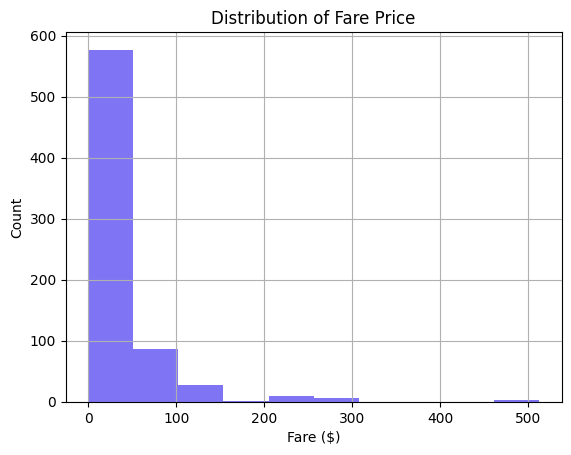

In [44]:
titanic.hist('Fare', color = "#7f74f4")
plt.ylabel('Count')
plt.xlabel('Fare ($)')
plt.title('Distribution of Fare Price')
plt.savefig("Histogram.png")
#this is a better show of the data distribution; the outliers are still presently effecting the data
#the fatre prices were inconsistent across classes and the difference was very large

#Pie Chart


In [16]:
port_survive = titanic.groupby('Embarked')['Survived'].sum()

In [17]:
port_count = titanic.groupby('Embarked')['Survived'].count()
print(port_count)

Embarked
C    130
Q     28
S    554
Name: Survived, dtype: int64


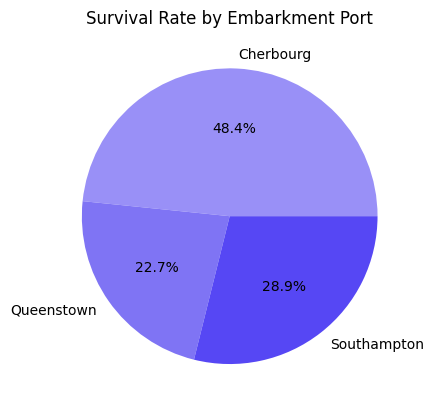

<Figure size 640x480 with 0 Axes>

In [39]:
port_survive = titanic.groupby('Embarked')['Survived'].mean()
port_labels = ['Cherbourg', 'Queenstown', 'Southampton']
port_colors = ['#9990f7','#7f74f4','#5647f4']
port_survive.index = port_labels
plt.pie(port_survive, labels=port_survive.index, autopct='%1.1f%%', colors = port_colors)
plt.title('Survival Rate by Embarkment Port')
plt.show()
plt.savefig("Pie.png")
#the pie chart shows that the rate of survival was higher for the Cherbourg port passangers
#it is important to note that the results could be swayed by the count of samples from each port


#Correlation Scores

In [19]:
corr_scores = titanic.corr(numeric_only=True)
print(corr_scores)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.029526 -0.035609  0.033681 -0.082704 -0.011672   
Survived        0.029526  1.000000 -0.356462 -0.082446 -0.015523  0.095265   
Pclass         -0.035609 -0.356462  1.000000 -0.365902  0.065187  0.023666   
Age             0.033681 -0.082446 -0.365902  1.000000 -0.307351 -0.187896   
SibSp          -0.082704 -0.015523  0.065187 -0.307351  1.000000  0.383338   
Parch          -0.011672  0.095265  0.023666 -0.187896  0.383338  1.000000   
Fare            0.009655  0.266100 -0.552893  0.093143  0.139860  0.206624   

                 Fare  
PassengerId  0.009655  
Survived     0.266100  
Pclass      -0.552893  
Age          0.093143  
SibSp        0.139860  
Parch        0.206624  
Fare         1.000000  


([<matplotlib.axis.YTick at 0x7fe997937100>,
 [Text(0, 0, 'PassengerId'),
  Text(0, 1, 'Survived'),
  Text(0, 2, 'Pclass'),
  Text(0, 3, 'Age'),
  Text(0, 4, 'SibSp'),
  Text(0, 5, 'Parch'),
  Text(0, 6, 'Fare')])

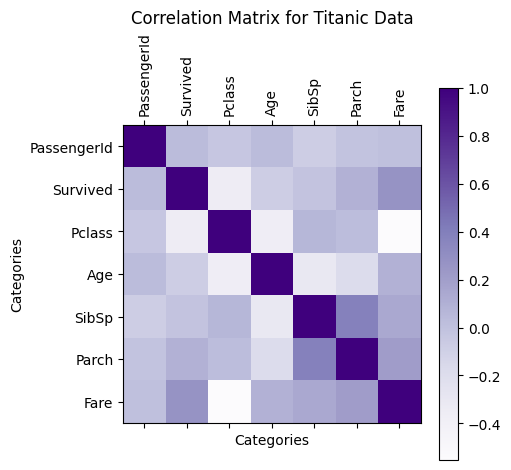

In [47]:
plt.matshow(corr_scores, cmap ='Purples')
plt.xlabel("Categories")
plt.ylabel("Categories")
plt.title("Correlation Matrix for Titanic Data")
plt.colorbar()
num_labels = len(corr_scores.index)
plt.xticks(ticks=range(num_labels), labels=corr_scores.index, rotation=90)
plt.yticks(ticks=range(num_labels), labels=corr_scores.index, rotation=0)
#there are no really high correlation scores between any catagory
#age and class are related in some capacity, which makes sense
#class and survival rate is related; this makes sense based on class placement on the ship
#fare prices and class are also related

#Scatter Plot

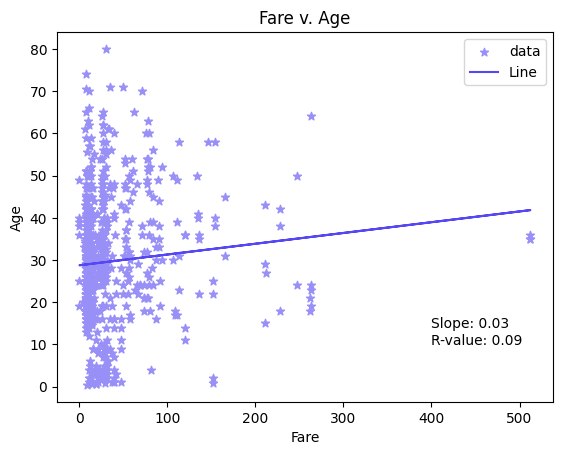

In [46]:
model = scipy.stats.linregress(titanic['Fare'],titanic['Age'])
plt.scatter(titanic['Fare'],titanic['Age'], label = 'data', color = '#9990f7', marker = '*')

slope = model.slope #slope calculation
intercept = model.intercept
x = titanic['Fare']
fit = slope*x + intercept
plt.plot(titanic['Fare'], fit, label = 'Line', color ='#5647f4') #best fit line

r_value = model.rvalue #R-value Calculation
plt.text(400, 10, f"Slope: {slope:.2f}\nR-value: {r_value:.2f}") #plotting the two values on the graph

plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare v. Age')
plt.legend()
plt.savefig("Scatter.png")

#Contingency Table and Chi2

In [22]:
contingency_table = pd.crosstab(titanic['Sex'], titanic['Survived'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('chisquared value:',chi2)
print('p-value:',p)

# the chisquared value is relatively high, this means that there is a great difference between observed and expected values
# this large number could mean that the catagories are not independent
# the p-value is below 0.05 so the relationship is strongly effecting each other

chisquared value: 202.86944877617123
p-value: 4.939416685451492e-46


In [23]:
print(contingency_table)

Survived    0    1
Sex               
female     64  195
male      360   93
